In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [54]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [55]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [56]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

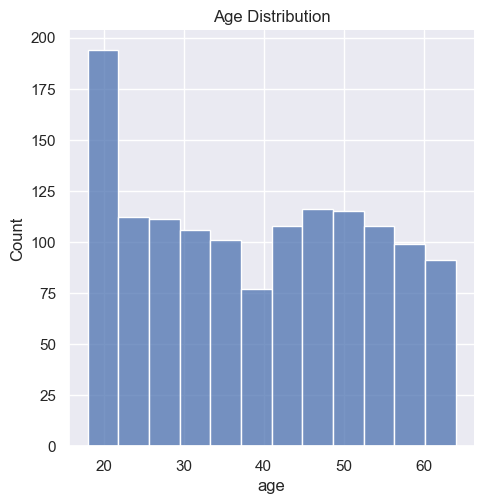

In [57]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(df['age'])
plt.title('Age Distribution')
plt.show()

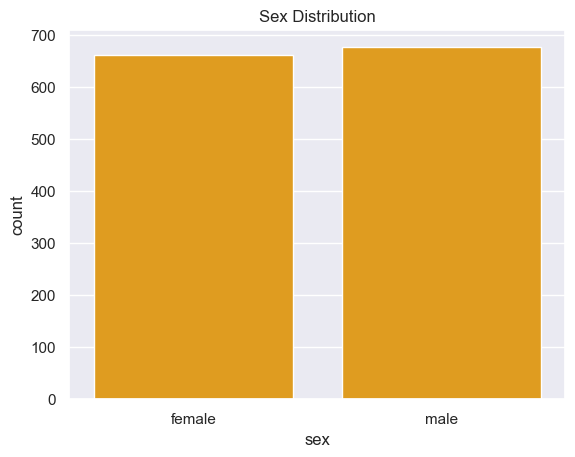

In [58]:
plt.Figure(figsize=(6,6))
sns.countplot(x='sex', color='orange', data=df)
plt.title('Sex Distribution')
plt.show()

In [59]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

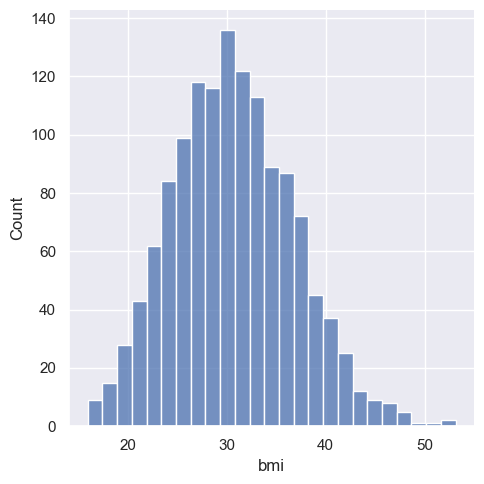

In [60]:
sns.displot(df['bmi'])
plt.show()

In [61]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [62]:
df.replace({'sex':{'male':0, 'female':1}}, inplace=True)
df.replace({'smoker':{'yes':0, 'no':1}},inplace=True)

C:\Users\yuvra\AppData\Local\Temp\ipykernel_15120\935480386.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex':{'male':0, 'female':1}}, inplace=True)
C:\Users\yuvra\AppData\Local\Temp\ipykernel_15120\935480386.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'smoker':{'yes':0, 'no':1}},inplace=True)


In [63]:
df.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}},inplace=True)


C:\Users\yuvra\AppData\Local\Temp\ipykernel_15120\3641189357.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}},inplace=True)


In [64]:
X = df.drop(columns='charges',axis=1)
y = df['charges']

In [65]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [66]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [68]:
df.shape

(1338, 7)

In [69]:
X_train.shape


(1070, 6)

In [70]:
X_test.shape

(268, 6)

In [71]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [72]:
training_data_prediction = reg.predict(X_train)

In [73]:
r2_train = metrics.r2_score(y_train, training_data_prediction)
r2_train

0.744990334818506

In [74]:
test_data_prediction = reg.predict(X_test)
metrics.r2_score(y_test, test_data_prediction)

0.7637100145767151

In [81]:
sample_input_data = (46,1,33.4,1,1,0)

In [ ]:
input_data_as_nparray = np.asarray(sample_input_data)
input_data_reshaped = input_data_as_nparray.reshape(1,-1)
prediction = reg.predict(input_data_reshaped)

In [84]:
print("The insurance cost is", prediction)

The insurance cost is [10760.75953751]
